# Загружаем данные

In [183]:
import pandas as pd
import numpy as np
import wfdb
import ast


def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path + f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path + f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data


path = 'plt/'
sampling_rate = 100

# load and convert annotation data
Y = pd.read_csv(path + 'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)

# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path + 'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]


def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))


# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

# ДатаФрейм Y

In [184]:
Y.head(10)

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM]
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM]
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM]
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[NORM]
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[NORM]
6,19005.0,18.0,1,NaN,58.0,2.0,0.0,CS-12 E,1984-11-28 13:32:13,sinusrhythmus normales ekg,...,", V1",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00006_lr,records500/00000/00006_hr,[NORM]
7,16193.0,54.0,0,NaN,83.0,2.0,0.0,CS-12 E,1984-11-28 13:32:22,"sinusrhythmus linkstyp t abnormal, wahrscheinl...",...,NaN,NaN,NaN,NaN,NaN,NaN,7,records100/00000/00007_lr,records500/00000/00007_hr,[NORM]
8,11275.0,48.0,0,NaN,95.0,2.0,0.0,CS-12 E,1984-12-01 14:49:52,sinusrhythmus linkstyp qrs(t) abnormal infe...,...,", II,AVF",", I-AVF,",NaN,NaN,NaN,NaN,9,records100/00000/00008_lr,records500/00000/00008_hr,[MI]
9,18792.0,55.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-12-08 09:44:43,sinusrhythmus normales ekg,...,NaN,", I-AVR,",NaN,NaN,NaN,NaN,10,records100/00000/00009_lr,records500/00000/00009_hr,[NORM]


# Добавим новый признак is_MI

In [185]:
res = []
for item in Y['diagnostic_superclass']:
    if item == ['NORM']:
        res.append(0)
        continue
    if item == ['MI']:
        res.append(1)
        continue
    res.append(np.nan)
Y['is_MI'] = res
Y

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass,is_MI
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM],0.0
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM],0.0
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM],0.0
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[NORM],0.0
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[NORM],0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr,[STTC],NaN
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,[NORM],0.0
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr,[STTC],NaN


# Удаляем все что не НОРМ и Миакард

In [186]:
Y = Y.drop(Y[Y.is_MI.isna()].index)
Y

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass,is_MI
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM],0.0
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM],0.0
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM],0.0
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[NORM],0.0
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[NORM],0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21830,10520.0,86.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-05-28 07:53:21,sinusrhythmus lagetyp normal periphere nieders...,...,NaN,NaN,NaN,NaN,NaN,1,records100/21000/21830_lr,records500/21000/21830_hr,[NORM],0.0
21831,11905.0,55.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-28 12:49:25,sinusrhythmus lagetyp normal normales ekg 4.46...,...,NaN,NaN,NaN,NaN,NaN,9,records100/21000/21831_lr,records500/21000/21831_hr,[NORM],0.0
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,[NORM],0.0


# Разделяем на test и train

In [187]:
# Split data into train and test
test_fold = 10
# Train
X_train = X[np.where(Y.strat_fold != test_fold)]
y_train = Y[(Y.strat_fold != test_fold)].is_MI
# Test
X_test = X[np.where(Y.strat_fold == test_fold)]
y_test = Y[Y.strat_fold == test_fold].is_MI

In [188]:
y_train.head(100)

ecg_id
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
161    1.0
163    0.0
165    0.0
166    0.0
174    0.0
Name: is_MI, Length: 100, dtype: float64

# Все норм

In [189]:
X_train.shape

(10433, 1000, 12)

In [190]:
y_train.shape

(10433,)

In [191]:
X_test.shape

(1168, 1000, 12)

In [192]:
y_test.shape

(1168,)

# Функция для рисования всех рядов

In [193]:
from matplotlib import pyplot as plt
import seaborn as sns


def plot_series(series: pd.DataFrame, size=(25, 70), rows=12):
    if series.shape[1] != 12:
        raise ValueError('Frame columns must be 12')

    if rows > 12:
        raise ValueError('Rows must be less or equal than 12')

    fig, axs = plt.subplots(rows, figsize=size)
    all_axs = [axs[i] for i in range(rows)]
    curr_ax = 0
    for ser in series.T:
        sns.lineplot(ser, ax=all_axs[curr_ax])
        curr_ax += 1

In [194]:
y_train.head(10)

ecg_id
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     1.0
10    0.0
11    0.0
Name: is_MI, dtype: float64

In [195]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.classification.dictionary_based import BOSSEnsemble
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.datasets import load_basic_motions
from sktime.transformations.panel.compose import ColumnConcatenator


In [207]:
X_train.shape

(10433, 1000, 12)

In [208]:
X_test.shape

(1168, 1000, 12)

# Преобразовать форму рядов

In [209]:
def represent(time_series: np.array) -> pd.DataFrame:
    res = []
    features = time_series.shape[2]
    print(features)
    for i in range(time_series.shape[0]):
        tmp_res = []
        for feature in range(features):
            to_series = pd.Series(time_series[i].T[feature].copy())
            tmp_res.append(to_series)
        res.append(tmp_res)
    return pd.DataFrame(res, columns=[f'feature {i}' for i in range(1, 13)])

In [210]:
ECG_COUNT = 1000

In [211]:
X_train = represent(X_train).head(ECG_COUNT)
X_train

12


,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12
0,0 -0.119 1 -0.116 2 -0.120 3 -...,0 -0.055 1 -0.051 2 -0.044 3 -...,0 0.064 1 0.065 2 0.076 3 ...,0 0.086 1 0.083 2 0.082 3 ...,0 -0.091 1 -0.090 2 -0.098 3 -...,0 0.004 1 0.006 2 0.016 3 ...,0 -0.069 1 -0.064 2 -0.058 3 -...,0 -0.031 1 -0.036 2 -0.034 3 -...,0 0.000 1 -0.003 2 -0.010 3 -...,0 -0.026 1 -0.031 2 -0.028 3 -...,0 -0.039 1 -0.034 2 -0.029 3 -...,0 -0.079 1 -0.074 2 -0.069 3 -...
1,0 0.004 1 -0.020 2 -0.053 3 -...,0 0.138 1 0.116 2 0.092 3 ...,0 0.134 1 0.136 2 0.145 3 ...,0 -0.072 1 -0.048 2 -0.020 3 -...,0 -0.065 1 -0.078 2 -0.100 3 -...,0 0.136 1 0.125 2 0.118 3 ...,0 -0.123 1 -0.102 2 -0.082 3 -...,0 0.088 1 0.066 2 0.043 3 ...,0 0.143 1 0.113 2 0.069 3 ...,0 0.192 1 0.156 2 0.107 3 ...,0 0.083 1 0.057 2 0.013 3 -...,0 0.088 1 0.063 2 0.022 3 ...
2,0 -0.029 1 -0.035 2 -0.054 3 -...,0 -0.079 1 -0.070 2 -0.057 3 -...,0 -0.049 1 -0.035 2 -0.003 3 -...,0 0.054 1 0.052 2 0.056 3 ...,0 0.011 1 0.000 2 -0.025 3 -...,0 -0.064 1 -0.052 2 -0.030 3 -...,0 0.005 1 0.013 2 0.019 3 ...,0 -0.051 1 -0.047 2 -0.048 3 -...,0 -0.116 1 -0.120 2 -0.105 3 -...,0 -0.103 1 -0.104 2 -0.078 3 -...,0 -0.076 1 -0.079 2 -0.066 3 -...,0 -0.066 1 -0.068 2 -0.054 3 -...
3,0 -0.054 1 -0.053 2 -0.063 3 -...,0 -0.138 1 -0.156 2 -0.153 3 -...,0 -0.083 1 -0.103 2 -0.090 3 -...,0 0.096 1 0.105 2 0.108 3 ...,0 0.015 1 0.025 2 0.014 3 ...,0 -0.110 1 -0.129 2 -0.121 3 -...,0 0.025 1 0.027 2 0.032 3 ...,0 -0.035 1 -0.038 2 -0.051 3 -...,0 -0.040 1 -0.043 2 -0.059 3 -...,0 -0.300 1 -0.303 2 -0.312 3 -...,0 -0.184 1 -0.185 2 -0.193 3 -...,0 -0.174 1 -0.176 2 -0.185 3 -...
4,0 -0.034 1 -0.038 2 -0.057 3 -...,0 -0.574 1 -0.575 2 -0.584 3 -...,0 -0.540 1 -0.537 2 -0.527 3 -...,0 0.304 1 0.306 2 0.320 3 ...,0 0.253 1 0.250 2 0.235 3 ...,0 -0.556 1 -0.555 2 -0.555 3 -...,0 0.200 1 0.199 2 0.195 3 ...,0 0.250 1 0.248 2 0.242 3 ...,0 0.135 1 0.132 2 0.126 3 ...,0 0.165 1 0.163 2 0.157 3 ...,0 0.135 1 0.134 2 0.130 3 ...,0 0.115 1 0.114 2 0.110 3 ...
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0 -0.314 1 -0.304 2 -0.323 3 -...,0 -0.239 1 -0.233 2 -0.244 3 -...,0 0.075 1 0.071 2 0.079 3 ...,0 0.276 1 0.269 2 0.283 3 ...,0 -0.194 1 -0.188 2 -0.201 3 -...,0 -0.082 1 -0.081 2 -0.082 3 -...,0 0.015 1 0.015 2 0.015 3 ...,0 -0.195 1 -0.202 2 -0.212 3 -...,0 -0.060 1 -0.065 2 -0.077 3 -...,0 0.070 1 0.070 2 0.070 3 ...,0 0.290 1 0.290 2 0.290 3 ...,0 0.440 1 0.438 2 0.434 3 ...
996,0 -0.085 1 -0.085 2 -0.085 3 -...,0 -0.095 1 -0.095 2 -0.095 3 -...,0 -0.010 1 -0.010 2 -0.010 3 -...,0 0.090 1 0.090 2 0.090 3 ...,0 -0.037 1 -0.037 2 -0.037 3 -...,0 -0.052 1 -0.052 2 -0.052 3 -...,0 0.015 1 0.015 2 0.015 3 ...,0 -0.115 1 -0.115 2 -0.115 3 -...,0 0.000 1 0.000 2 -0.003 3 -...,0 0.005 1 0.004 2 0.000 3 -...,0 0.025 1 0.022 2 0.016 3 ...,0 0.630 1 0.628 2 0.624 3 ...
997,0 0.073 1 0.055 2 0.056 3 ...,0 0.123 1 0.117 2 0.142 3 ...,0 0.049 1 0.062 2 0.086 3 ...,0 -0.098 1 -0.086 2 -0.099 3 -...,0 0.012 1 -0.004 2 -0.015 3 ...,0 0.086 1 0.089 2 0.114 3 ...,0 -0.023 1 -0.025 2 -0.014 3 -...,0 0.200 1 0.219 2 0.256 3 ...,0 0.162 1 0.187 2 0.225 3 ...,0 -0.034 1 -0.027 2 -0.013 3 ...,0 0.080 1 0.080 2 0.086 3 ...,0 -0.089 1 -0.083 2 -0.072 3 -...
998,0 -0.013 1 -0.012 2 0.001 3 -...,0 0.005 1 0.005 2 0.005 3 ...,0 0.018 1 0.017 2 0.005 3 ...,0 0.004 1 0.004 2 -0.003 3 ...,0 -0.016 1 -0.015 2 -0.002 3 -...,0 0.011 1 0.011 2 0.005 3 ...,0 0.470 1 0.470 2 0.470 3 ...,0 0.065 1 0.076 2 0.087 3 ...,0 -0.310 1 -0.309 2 -0.311 3 -...,0 -0.010 1 -0.010 2 -0.013 3 -...,0 0.070 1 0.070 2 0.066 3 ...,0 -0.020 1 -0.019 2 -0.015 3 -...


In [212]:
X_test = represent(X_test).head(ECG_COUNT)
X_test

12


,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12
0,0 -0.145 1 -0.115 2 -0.064 3 -...,0 -0.097 1 -0.083 2 -0.060 3 -...,0 0.049 1 0.032 2 0.005 3 -...,0 0.121 1 0.099 2 0.062 3 ...,0 -0.096 1 -0.073 2 -0.034 3 -...,0 -0.024 1 -0.025 2 -0.027 3 -...,0 -0.579 1 -0.369 2 -0.088 3 -...,0 -0.818 1 -0.523 2 -0.147 3 -...,0 -0.647 1 -0.454 2 -0.196 3 -...,0 -0.452 1 -0.339 2 -0.188 3 -...,0 -0.269 1 -0.246 2 -0.199 3 -...,0 -0.032 1 -0.041 2 -0.040 3 -...
1,0 0.026 1 0.016 2 -0.058 3 -...,0 -0.073 1 -0.078 2 -0.103 3 -...,0 -0.100 1 -0.094 2 -0.046 3 -...,0 0.024 1 0.031 2 0.081 3 ...,0 0.063 1 0.056 2 -0.006 3 ...,0 -0.086 1 -0.086 2 -0.074 3 -...,0 0.154 1 0.147 2 0.139 3 ...,0 0.175 1 0.175 2 0.171 3 ...,0 0.946 1 0.959 2 0.976 3 ...,0 0.095 1 0.092 2 0.089 3 ...,0 0.050 1 0.050 2 0.050 3 ...,0 0.045 1 0.045 2 0.045 3 ...
2,0 -0.012 1 0.004 2 0.007 3 ...,0 -0.140 1 -0.138 2 -0.132 3 -...,0 -0.128 1 -0.142 2 -0.139 3 -...,0 0.077 1 0.067 2 0.063 3 ...,0 0.058 1 0.073 2 0.073 3 ...,0 -0.133 1 -0.139 2 -0.135 3 -...,0 0.100 1 0.098 2 0.092 3 ...,0 0.069 1 0.071 2 0.081 3 ...,0 0.055 1 0.055 2 0.055 3 ...,0 0.070 1 0.070 2 0.070 3 ...,0 -0.030 1 -0.029 2 -0.025 3 -...,0 -0.075 1 -0.074 2 -0.070 3 -...
3,0 -0.155 1 -0.164 2 -0.167 3 -...,0 -0.050 1 -0.048 2 -0.043 3 -...,0 0.105 1 0.117 2 0.124 3 ...,0 0.102 1 0.106 2 0.105 3 ...,0 -0.130 1 -0.140 2 -0.145 3 -...,0 0.027 1 0.034 2 0.040 3 ...,0 -0.145 1 -0.145 2 -0.142 3 -...,0 0.045 1 0.045 2 0.045 3 ...,0 0.025 1 0.025 2 0.026 3 ...,0 0.015 1 0.015 2 0.021 3 ...,0 0.130 1 0.130 2 0.130 3 ...,0 -0.005 1 -0.005 2 -0.008 3 -...
4,0 0.001 1 -0.010 2 -0.009 3 ...,0 -0.068 1 -0.081 2 -0.062 3 -...,0 -0.069 1 -0.071 2 -0.053 3 -...,0 0.034 1 0.046 2 0.036 3 ...,0 0.036 1 0.031 2 0.023 3 ...,0 -0.069 1 -0.076 2 -0.057 3 -...,0 0.040 1 0.053 2 0.074 3 ...,0 0.145 1 0.159 2 0.181 3 ...,0 0.017 1 0.027 2 0.040 3 ...,0 -0.089 1 -0.072 2 -0.048 3 -...,0 -0.015 1 -0.013 2 -0.007 3 -...,0 0.050 1 0.058 2 0.065 3 ...
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0 0.124 1 0.015 2 -0.063 3 -...,0 -0.005 1 -0.060 2 -0.086 3 -...,0 -0.129 1 -0.075 2 -0.022 3 -...,0 -0.059 1 0.023 2 0.075 3 ...,0 0.127 1 0.045 2 -0.020 3 -...,0 -0.067 1 -0.068 2 -0.054 3 -...,0 -0.367 1 -0.227 2 -0.008 3 ...,0 -0.592 1 -0.430 2 -0.133 3 -...,0 -0.416 1 -0.354 2 -0.175 3 -...,0 -0.303 1 -0.327 2 -0.231 3 -...,0 0.016 1 -0.077 2 -0.111 3 -...,0 0.179 1 0.061 2 -0.061 3 -...
996,0 -0.065 1 -0.076 2 -0.089 3 -...,0 -0.025 1 -0.040 2 -0.060 3 -...,0 0.040 1 0.036 2 0.029 3 ...,0 0.045 1 0.058 2 0.074 3 ...,0 -0.052 1 -0.056 2 -0.059 3 -...,0 0.007 1 -0.002 2 -0.015 3 -...,0 0.005 1 0.005 2 0.005 3 ...,0 -0.085 1 -0.085 2 -0.085 3 -...,0 -0.105 1 -0.105 2 -0.105 3 -...,0 -0.089 1 -0.088 2 -0.083 3 -...,0 -0.095 1 -0.095 2 -0.095 3 -...,0 -0.135 1 -0.135 2 -0.141 3 -...
997,0 -0.019 1 -0.006 2 -0.005 3 -...,0 -0.099 1 -0.083 2 -0.074 3 -...,0 -0.080 1 -0.077 2 -0.069 3 -...,0 0.059 1 0.045 2 0.040 3 ...,0 0.030 1 0.036 2 0.032 3 ...,0 -0.089 1 -0.079 2 -0.071 3 -...,0 0.051 1 0.057 2 0.053 3 ...,0 -0.030 1 -0.030 2 -0.030 3 -...,0 0.081 1 0.102 2 0.124 3 ...,0 -0.010 1 -0.009 2 -0.005 3 -...,0 -0.045 1 -0.045 2 -0.042 3 -...,0 -0.045 1 -0.044 2 -0.040 3 -...
998,0 -0.050 1 -0.044 2 -0.035 3 -...,0 -0.035 1 -0.027 2 -0.013 3 -...,0 0.015 1 0.017 2 0.022 3 ...,0 0.042 1 0.035 2 0.024 3 ...,0 -0.032 1 -0.030 2 -0.028 3 -...,0 -0.010 1 -0.005 2 0.004 3 ...,0 0.070 1 0.070 2 0.070 3 ...,0 0.293 1 0.267 2 0.213 3 ...,0 0.530 1 0.525 2 0.513 3 ...,0 0.147 1 0.113 2 0.069 3 ...,0 -0.008 1 0.009 2 0.027 3 ...,0 0.119 1 0.113 2 0.104 3 ...


In [213]:
y_train = y_train.head(ECG_COUNT)
y_train

ecg_id
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
2036    0.0
2037    0.0
2038    0.0
2040    0.0
2041    0.0
Name: is_MI, Length: 1000, dtype: float64

In [214]:
y_test = y_test.head(ECG_COUNT)
y_test

ecg_id
9        0.0
38       0.0
40       0.0
57       0.0
59       0.0
        ... 
17608    0.0
17621    0.0
17623    0.0
17641    0.0
17661    0.0
Name: is_MI, Length: 1000, dtype: float64

In [217]:
steps = [
    ("concatenate", ColumnConcatenator()),
    ("classify", TimeSeriesForestClassifier(n_estimators=100)),
]
clf = Pipeline(steps)
clf.fit(X_train, y_train)

Pipeline(steps=[('concatenate', ColumnConcatenator()),
                ('classify', TimeSeriesForestClassifier(n_estimators=100))])

# Pred test

In [218]:
pred_test = clf.predict_proba(X_test).T[0]
pred_test

array([0.82, 0.94, 0.92, 0.95, 0.95, 0.79, 0.91, 0.93, 0.88, 0.95, 0.83,
       0.9 , 0.95, 0.88, 0.96, 0.96, 0.74, 0.92, 0.87, 0.86, 0.94, 0.9 ,
       0.95, 0.89, 0.76, 0.93, 0.91, 0.91, 0.97, 0.96, 0.94, 0.9 , 0.89,
       0.84, 0.95, 0.89, 0.92, 0.9 , 0.88, 0.8 , 0.87, 0.92, 0.88, 0.78,
       0.77, 0.88, 0.74, 0.9 , 0.88, 0.86, 0.78, 0.98, 0.94, 0.91, 0.85,
       0.86, 0.68, 0.76, 0.9 , 0.92, 0.86, 0.93, 0.94, 0.89, 0.83, 0.92,
       0.84, 0.86, 0.76, 0.95, 0.91, 0.95, 0.96, 0.88, 0.95, 0.93, 0.84,
       0.9 , 0.92, 0.93, 0.86, 0.97, 0.97, 0.93, 0.89, 0.92, 0.9 , 0.59,
       0.96, 0.83, 0.96, 0.94, 0.95, 0.98, 0.93, 0.88, 0.8 , 0.92, 0.95,
       0.88, 0.82, 0.96, 0.97, 0.88, 0.82, 0.89, 0.92, 0.81, 0.65, 0.65,
       0.97, 0.37, 0.96, 0.98, 0.88, 0.95, 0.97, 0.73, 0.95, 0.94, 0.98,
       0.92, 0.91, 0.81, 0.74, 0.82, 0.94, 0.86, 0.96, 0.81, 0.95, 0.97,
       0.86, 0.72, 0.9 , 0.91, 0.98, 0.96, 0.98, 0.89, 0.84, 0.95, 0.89,
       0.8 , 0.96, 0.93, 0.86, 0.92, 0.9 , 0.94, 0.

# Y_test

In [233]:
y_test

ecg_id
9        0.0
38       0.0
40       0.0
57       0.0
59       0.0
        ... 
17608    0.0
17621    0.0
17623    0.0
17641    0.0
17661    0.0
Name: is_MI, Length: 1000, dtype: float64

# Pred train

In [219]:
pred_train = clf.predict_proba(X_train).T[0]
pred_train

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

# Y_train

In [220]:
y_train

ecg_id
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
2036    0.0
2037    0.0
2038    0.0
2040    0.0
2041    0.0
Name: is_MI, Length: 1000, dtype: float64

In [231]:
from sklearn.metrics import roc_auc_score, roc_curve


def roc_auc_plot(y_test, y_test_predicted, y_train, y_train_predicted):
    res_test = roc_auc_score(y_test, y_test_predicted)
    res_train = roc_auc_score(y_train, y_train_predicted)

    print(res_test, res_train)
    plt.figure(figsize=(10, 7))

    plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='val AUC={:.4f}'.format(res_test))
    plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(res_train))

    legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")
    plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
    plt.show()

0.47500589768871104 0.0


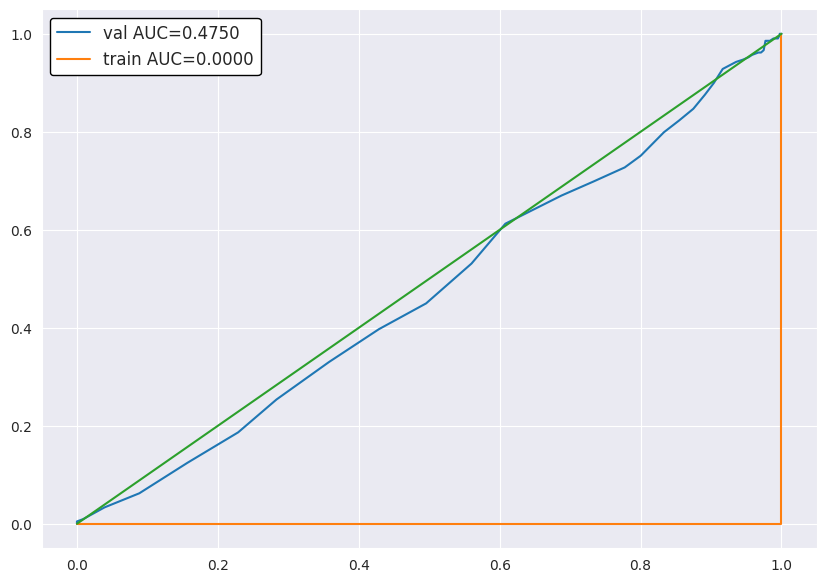

In [232]:
roc_auc_plot(y_test, pred_test, y_train, pred_train)